# Code to do green-screen point processing

# Mount Google Drive to Google Colab
Give Google Colab the permission to explore and use our Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load libraries

In [2]:
# Matplotlib is for visualization
import matplotlib.pyplot as plt
# Numpy is for computation
import numpy as np
# OpenCV (cv2) is for Computer Vision tools
import cv2

# Additional function to display image by using matplotlib

In [3]:
def display(img, caption=''):
    # Show image using pyplot 
    plt.figure()
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

In [4]:
def display_with_figsize(img, figsize=(8,68), caption=''):
    # Show image using pyplot with chosen figsize
    plt.figure(figsize=figsize)
    # Convert from BGR to RGB
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(caption)
    plt.axis('off')
    plt.show()

# Load the given image 

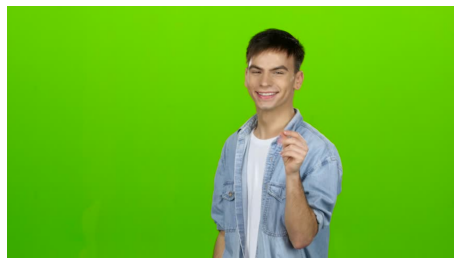

(480, 852, 3)


In [5]:
img = cv2.imread("12.jpg")
display_with_figsize(img)
print(img.shape)

# Convert image from `RGB` format to `HSV`.

Why we use HSV instead of RGB?  
https://dsp.stackexchange.com/questions/2687/why-do-we-use-the-hsv-colour-space-so-often-in-vision-and-image-processing

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(img_hsv[1,1,0])

45


Reference: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.ncl.ucar.edu%2FDocument%2FGraphics%2FColorTables%2FMPL_hsv.shtml&psig=AOvVaw0HP7UC6T322SvGmvVng06s&ust=1678864826784000&source=images&cd=vfe&ved=0CAMQjB1qFwoTCJiS6v7w2v0CFQAAAAAdAAAAABAE

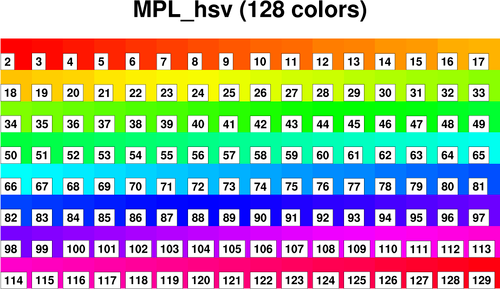

In [7]:
mask1 = img_hsv[:,:,0] < 52 # the 3rd index in  img_hsv: 0 - hue, 1 - saturation, 2 - value
print(mask1.sum())

364583


In [8]:
mask1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

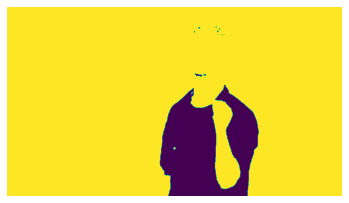

In [9]:
display(mask1)

In [10]:
mask2 = img_hsv[:,:,0] > 35
print(mask2.sum())

381265


In [11]:
mask2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

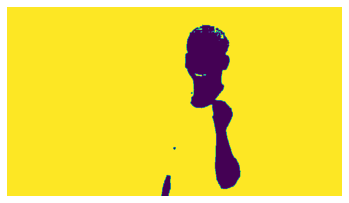

In [12]:
display(mask2)

In [13]:
mask = mask1.astype("int") + mask2.astype("int") # AND operator
human_mask = mask < 2

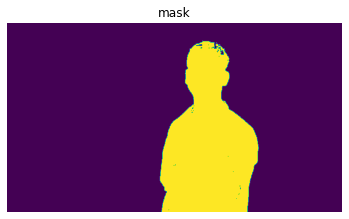

In [14]:
display(human_mask * 255,"mask")

# Morphopology: Closing 

## Section 3.3.3 in Richard Szeliski's Computer Vision: Algorithms and Applications, 2nd ed.puter 

Reference: https://www.google.com/url?sa=i&url=https%3A%2F%2Fpyimagesearch.com%2F2021%2F04%2F28%2Fopencv-morphological-operations%2F&psig=AOvVaw2w2e-NjT0Q48AjrsVMBmLL&ust=1678865495349000&source=images&cd=vfe&ved=0CBAQjhxqFwoTCODPz73z2v0CFQAAAAAdAAAAABAR

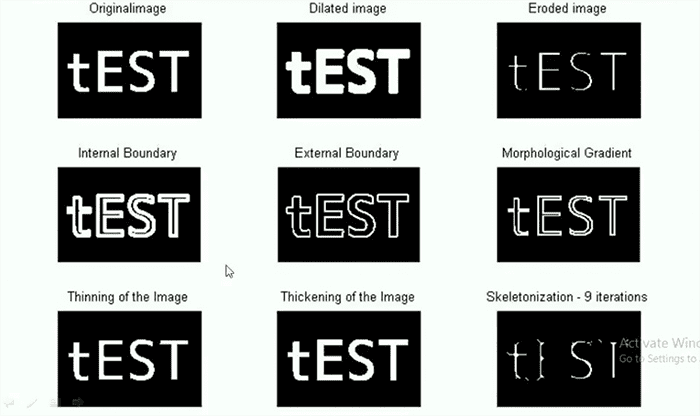

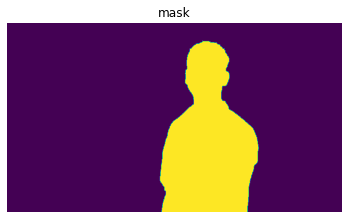

In [15]:
kernel = np.ones((7, 7), dtype=np.uint8)
closing = cv2.morphologyEx(np.float32(human_mask), cv2.MORPH_CLOSE, kernel)
closing = closing.astype(np.uint8)
display(closing * 255,"mask")

In [16]:
closing_mask = np.repeat(closing[:, :, np.newaxis], 3, axis=2)

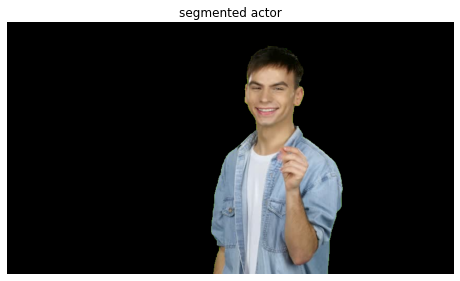

In [17]:
segmented_actor = img * closing_mask
display_with_figsize(segmented_actor, figsize=(8, 6), caption="segmented actor")

In [18]:
segmented_actor.shape

(480, 852, 3)

# The Fun part 

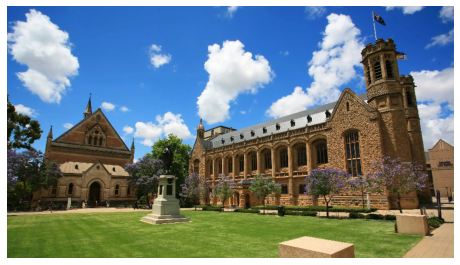

(480, 852, 3)

In [19]:
background = cv2.imread("UoA.jpeg")
resized_background = cv2.resize(background, (852, 480))
display_with_figsize(resized_background, figsize=(8, 6))
resized_background.shape

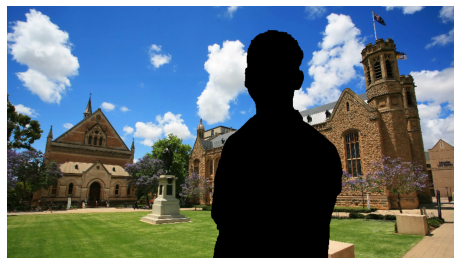

In [20]:
segmented_background = (1 - closing_mask) * resized_background
display_with_figsize(segmented_background, figsize=(8, 6))

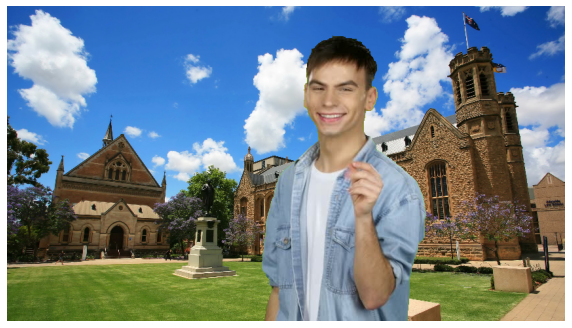

In [21]:
result = segmented_actor + segmented_background
display_with_figsize(result, figsize=(10, 10))

The result looks kind of lame, right? How about we use Gaussian filter to make it better.

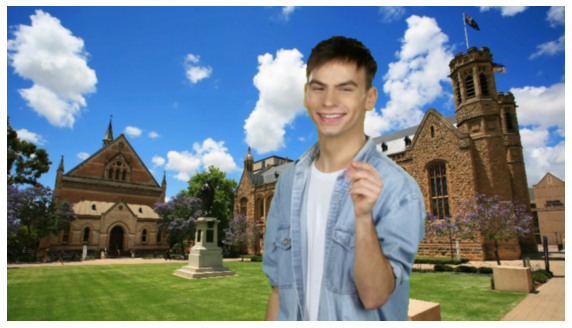

In [22]:
blurred_result = cv2.GaussianBlur(result, (3,3), 0)
display_with_figsize(blurred_result, figsize=(10, 10))

In [23]:
def blend(segmented_actor, background, ksize=(3,3), figsize=(10, 10)):
    resized_background = cv2.resize(background, (852, 480))
    segmented_background = (1 - closing_mask) * resized_background
    result = segmented_actor + segmented_background
    blurred_result = cv2.GaussianBlur(result, ksize, 0)
    display_with_figsize(blurred_result, figsize)

# Some stupid & fun results

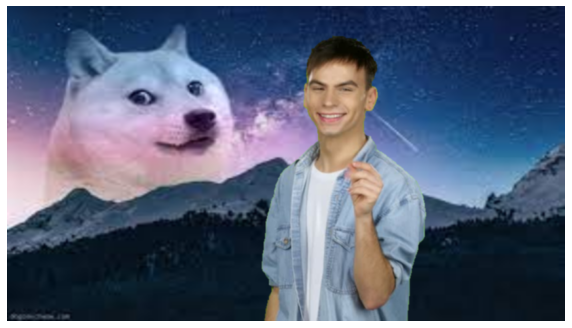

In [24]:
bg = cv2.imread('doge.jpeg')
blend(segmented_actor, bg, ksize=(3,3), figsize=(10, 10))

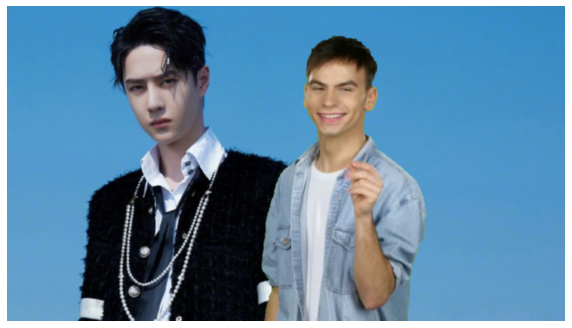

In [26]:
bg = cv2.imread('yibo.jpg')
blend(segmented_actor, bg, ksize=(3,3), figsize=(10, 10))

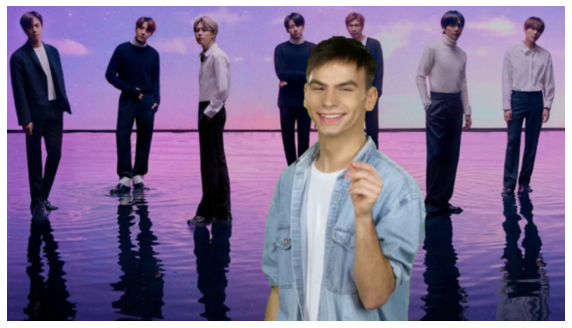

In [27]:
bg = cv2.imread('bts.jpg')
blend(segmented_actor, bg, ksize=(3,3), figsize=(10, 10))

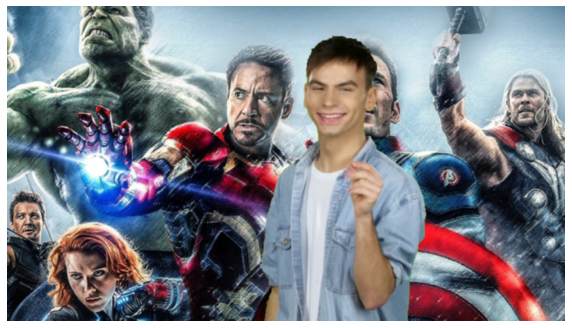

In [28]:
bg = cv2.imread('avenger.jpg')
blend(segmented_actor, bg, ksize=(3,3), figsize=(10, 10))

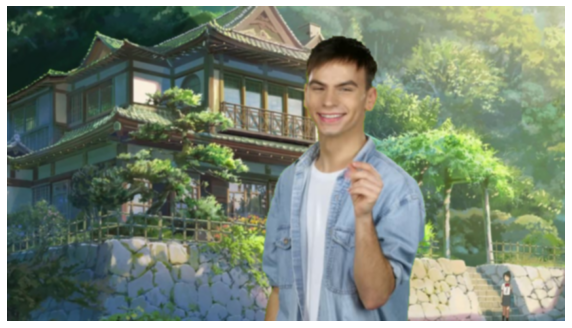

In [30]:
bg = cv2.imread('yourname.jpg')
blend(segmented_actor, bg, ksize=(5,5), figsize=(10, 10))

# Some geometric transformations of an image and corner detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import cv2 as cv

import numpy as np

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/test_img.jpg",-1)
print(img.shape)

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important

dst1 = cv.dilate(dst,(3,3))
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
display(img,"mask")

print(dst1[1:5,1:5])
#img = cv.imread("/content/drive/MyDrive/Colab Notebooks/test_img.jpg",-1)
img[dst1>0.01*dst1.max()]=[0,0,255]
display(img,"mask")


#img = cv.imread("/content/drive/MyDrive/Colab Notebooks/test_img.jpg",-1)

image = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)

gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
image[dst>0.01*dst.max()]=[0,0,255]
display(image,"mask")


#Try changing the contrast
#Try changing the color
#Try changing the scale


#img = cv.imread("/content/drive/MyDrive/Colab Notebooks/test_img.jpg",-1)
output = cv.resize(img, (480*2,293*2))

gray = cv.cvtColor(output,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
output[dst>0.01*dst.max()]=[0,0,255]
display(output,"mask")

